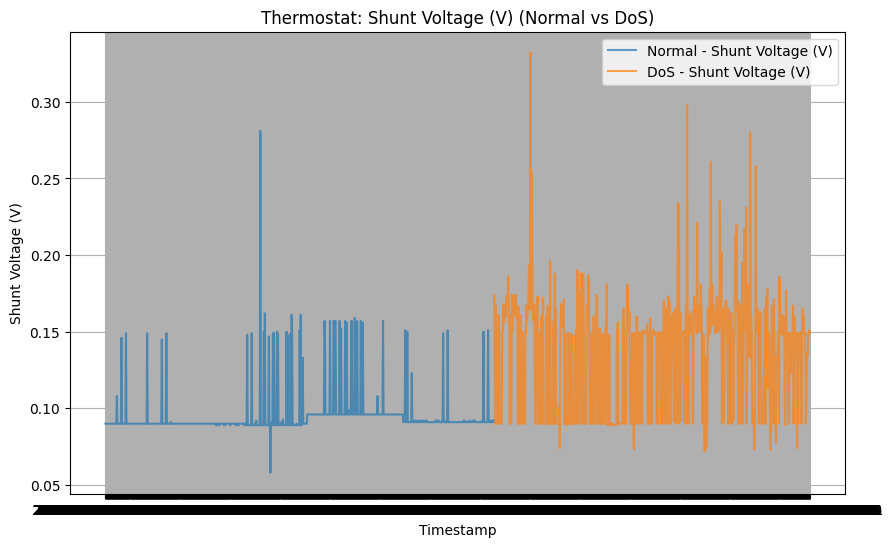

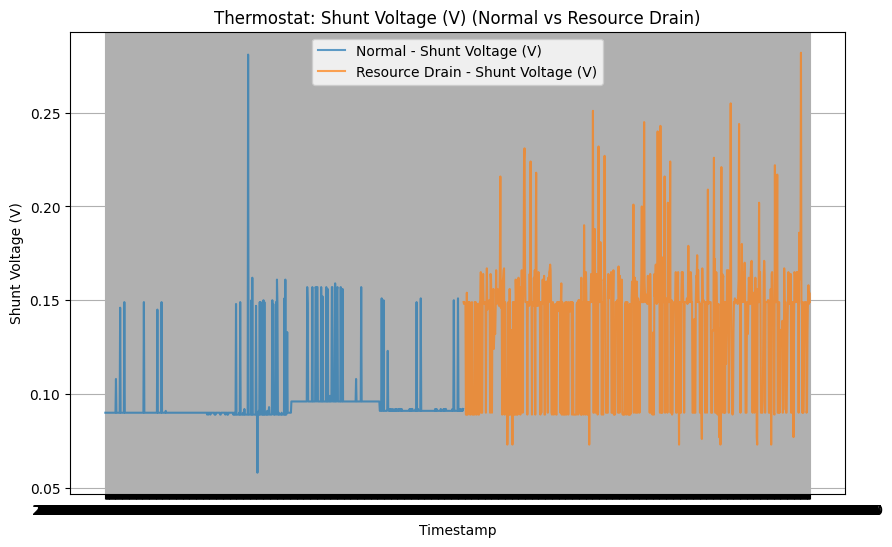

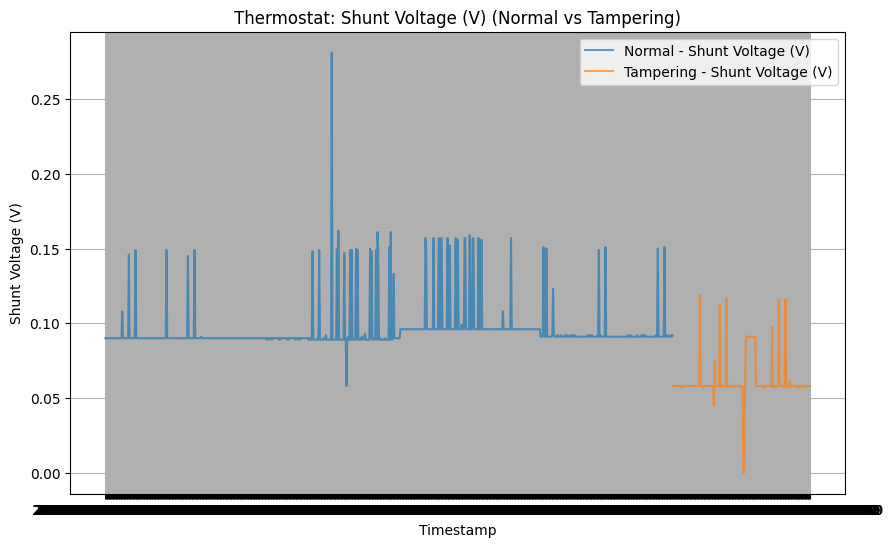

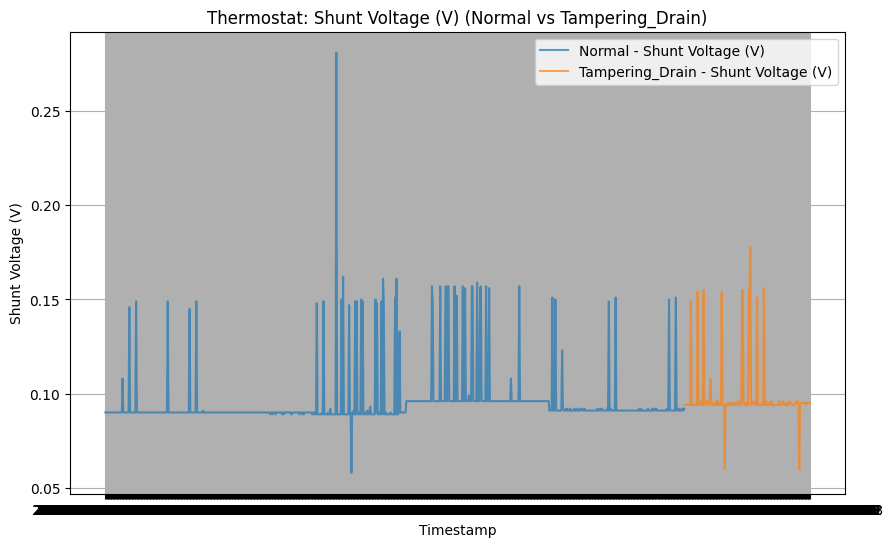

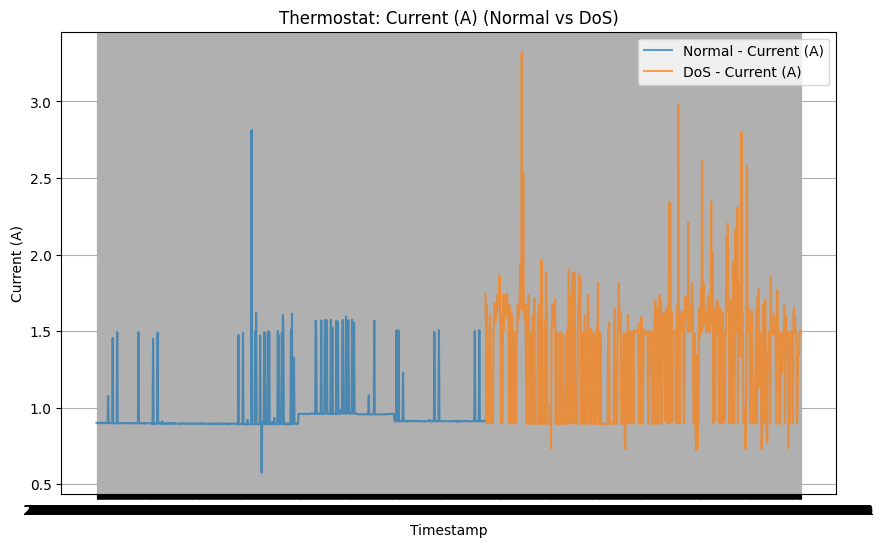

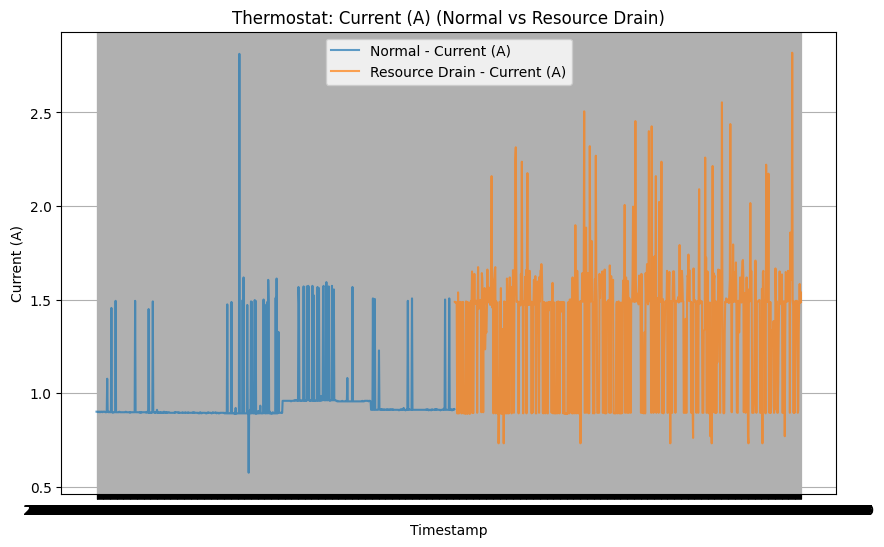

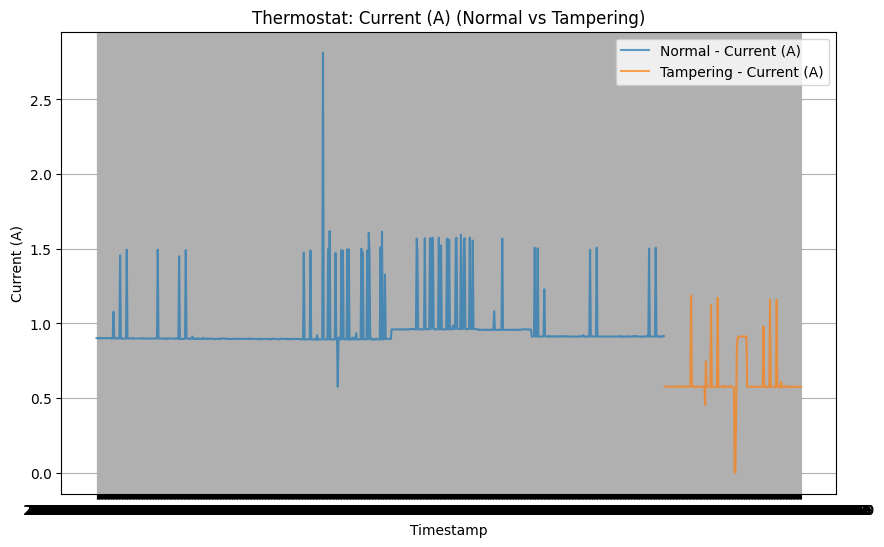

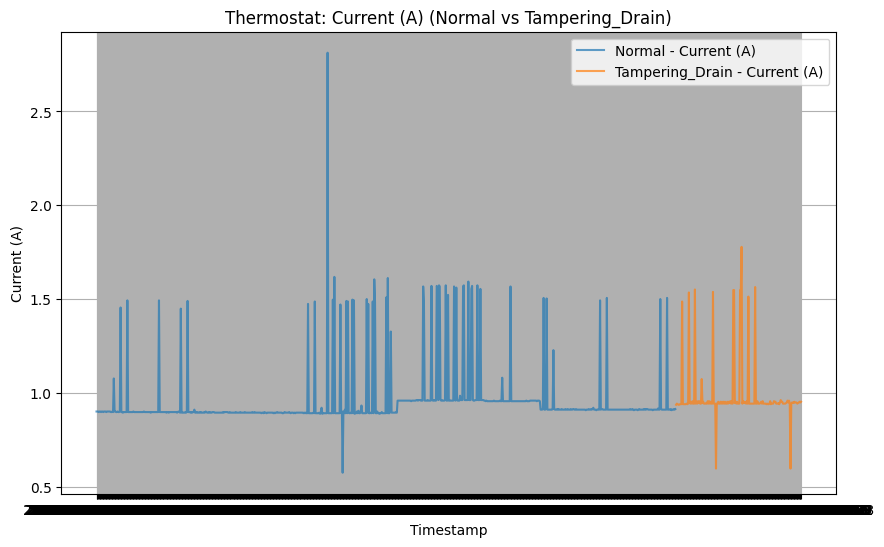

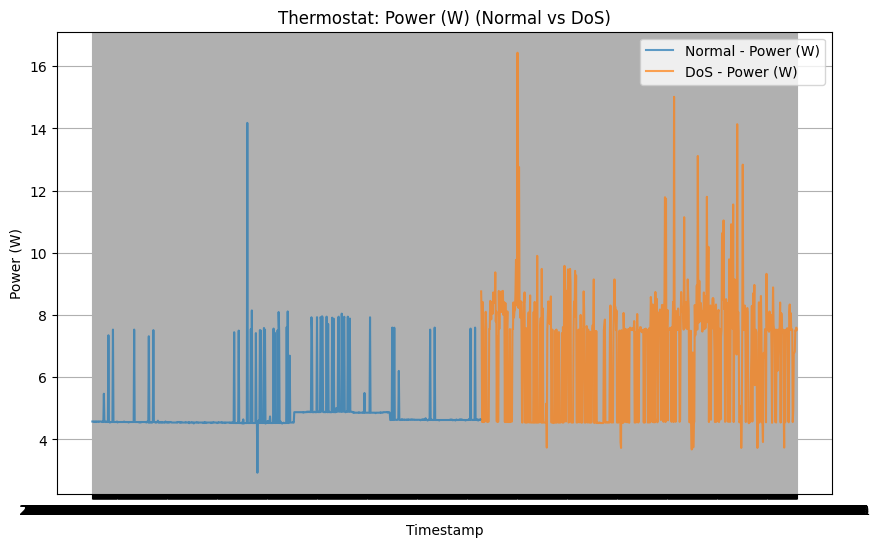

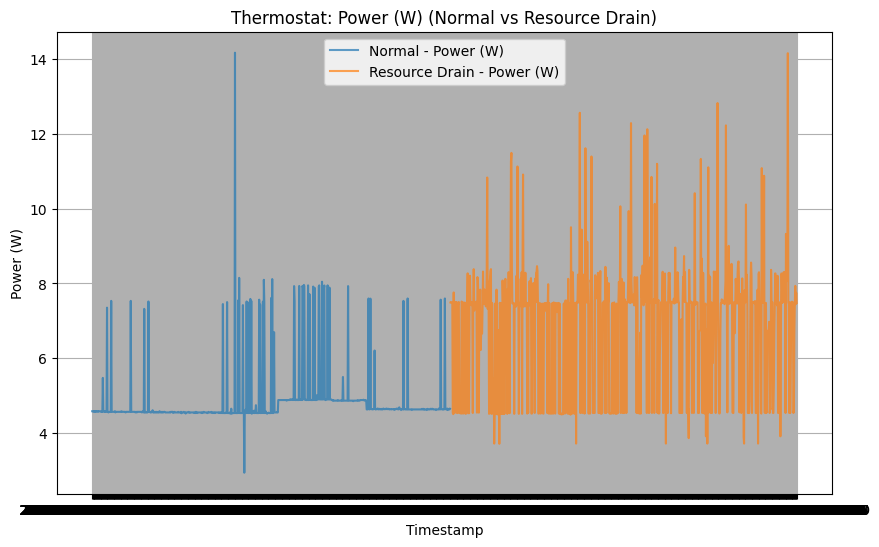

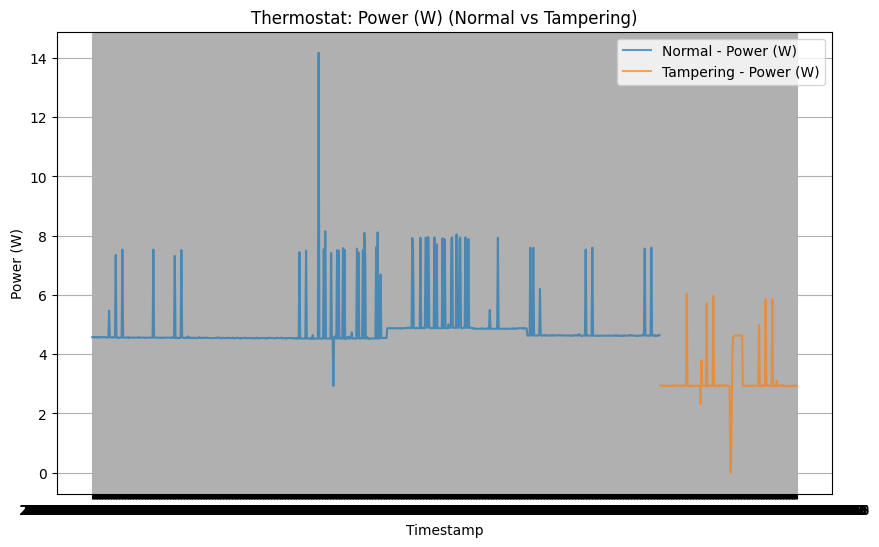

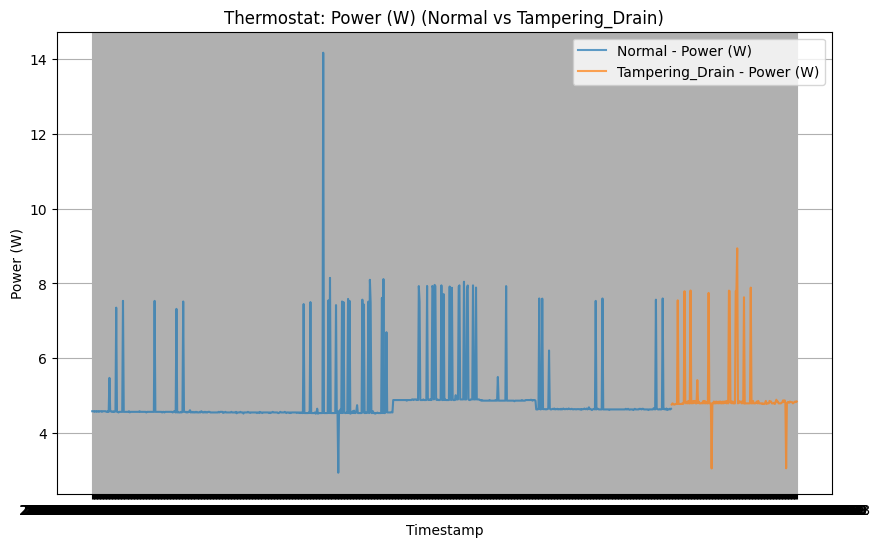

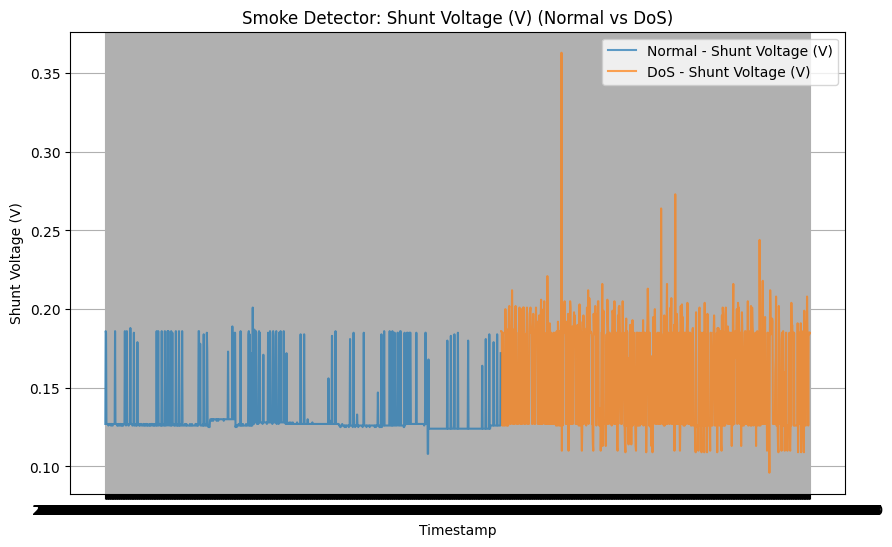

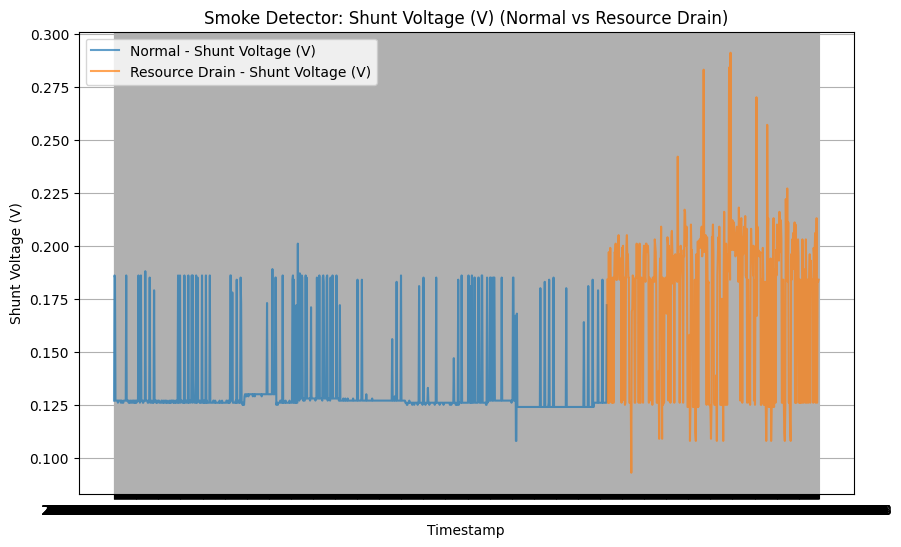

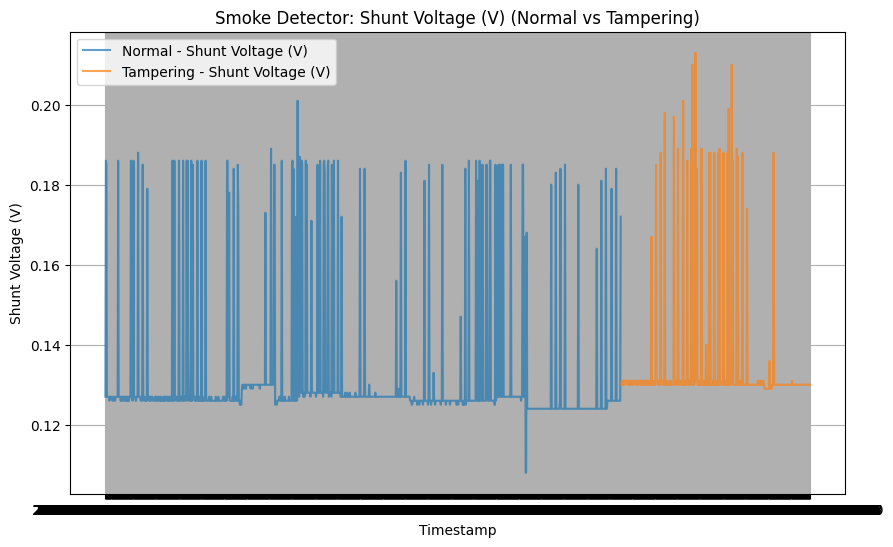

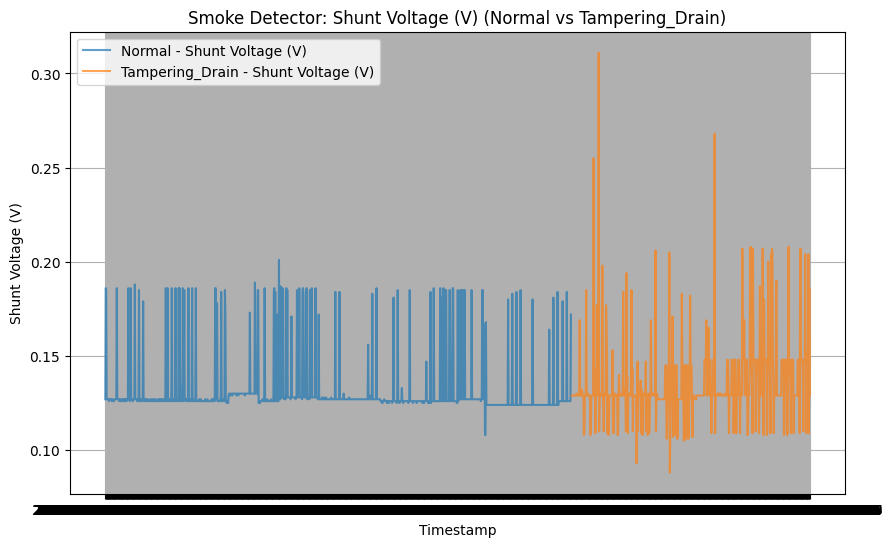

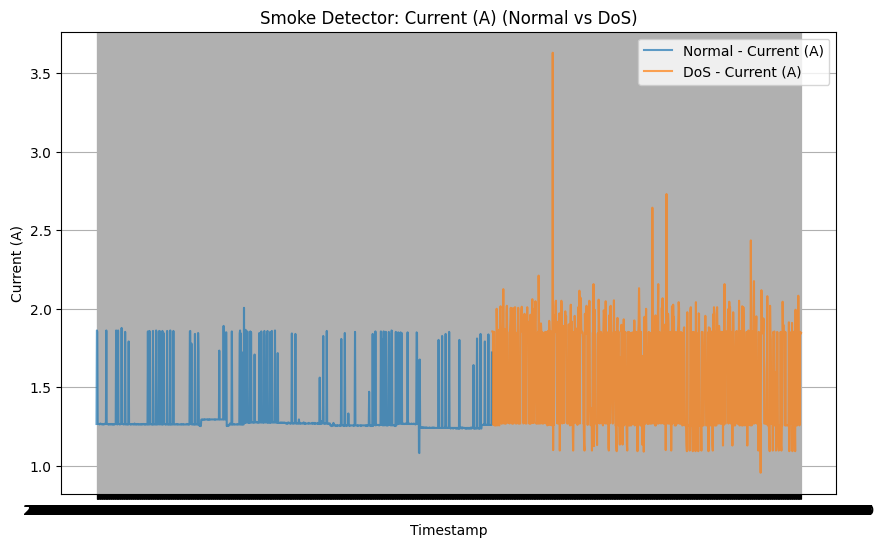

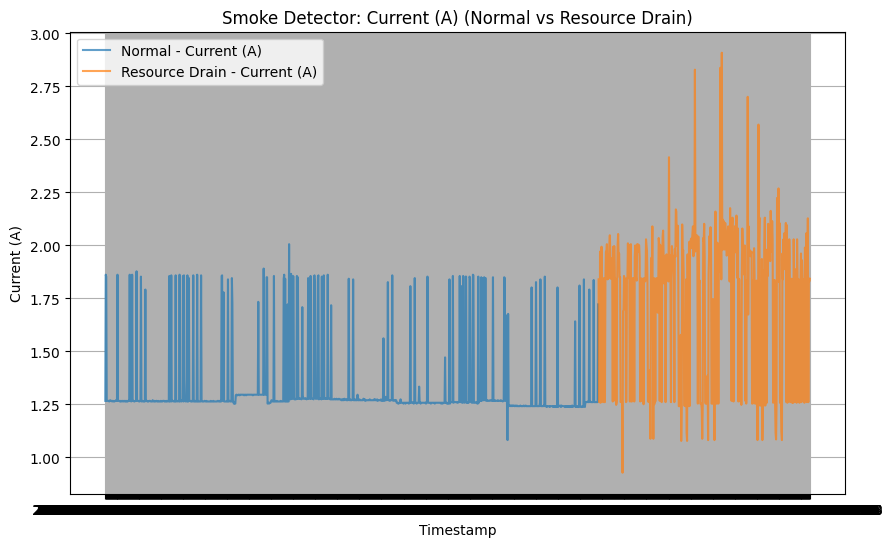

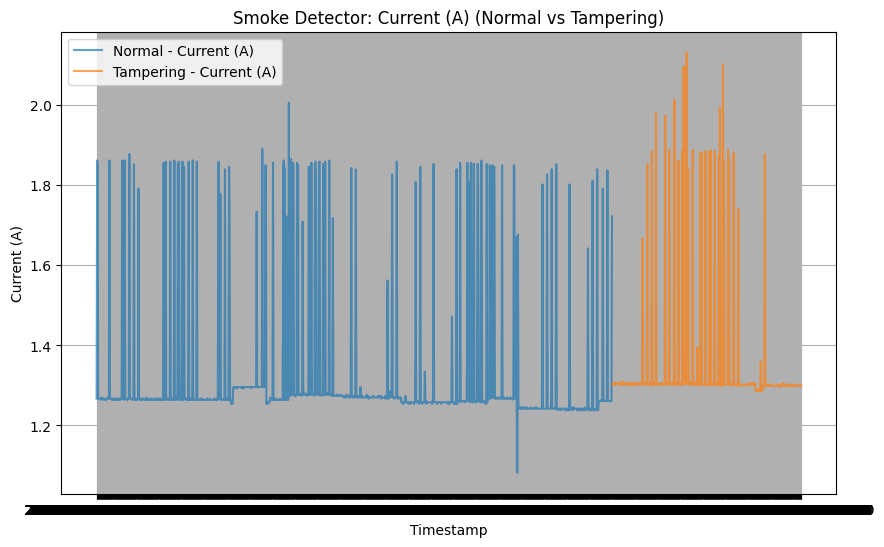

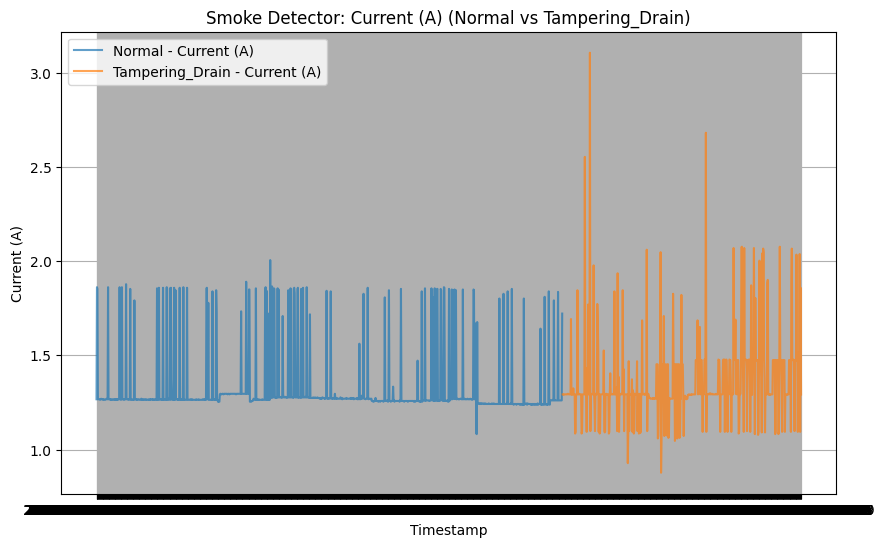

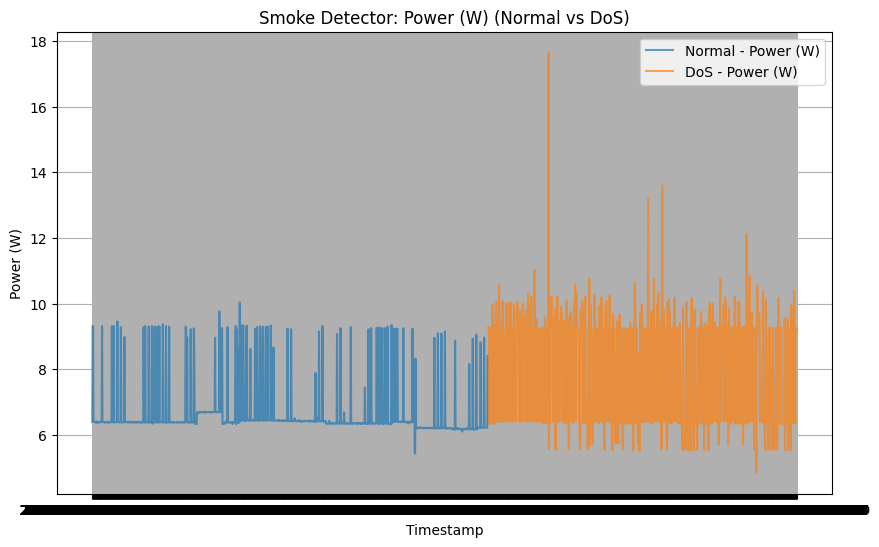

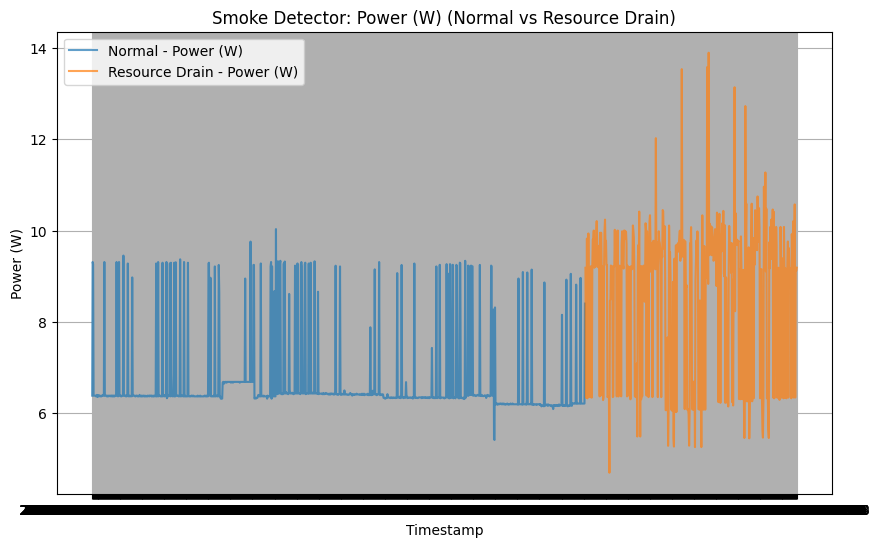

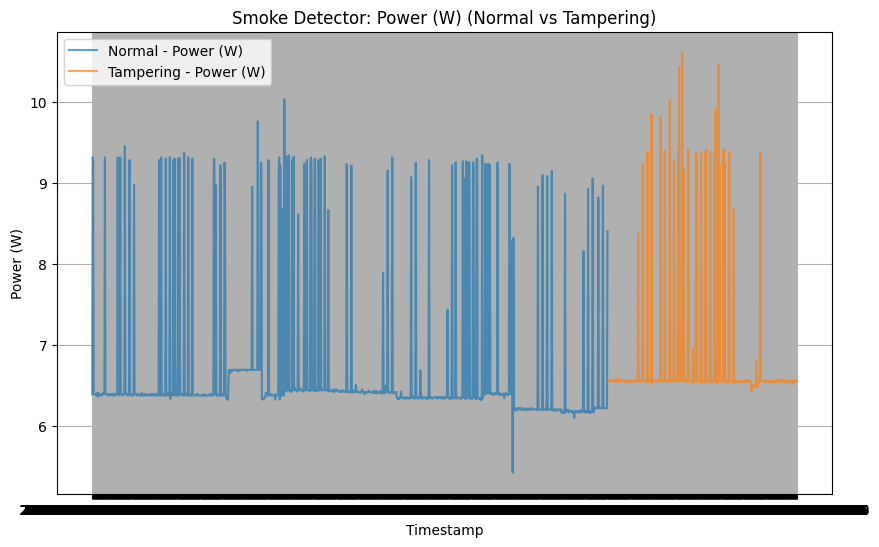

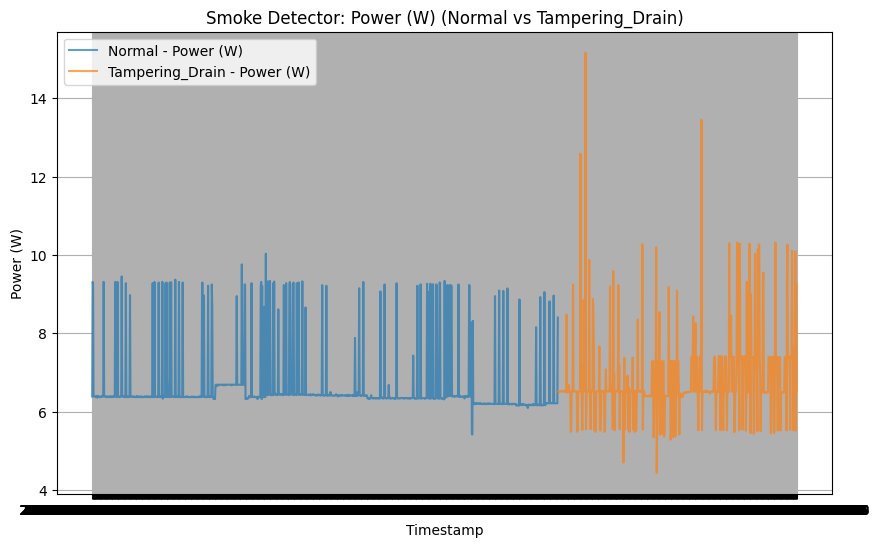

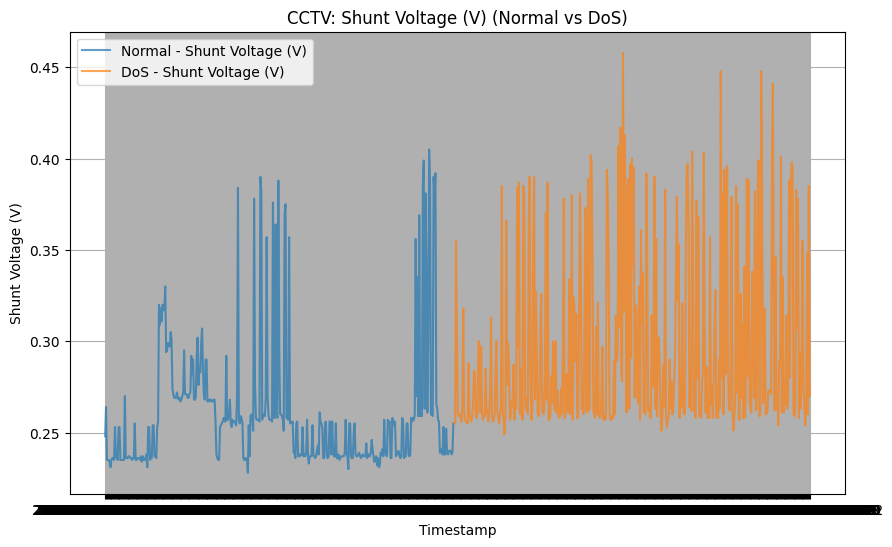

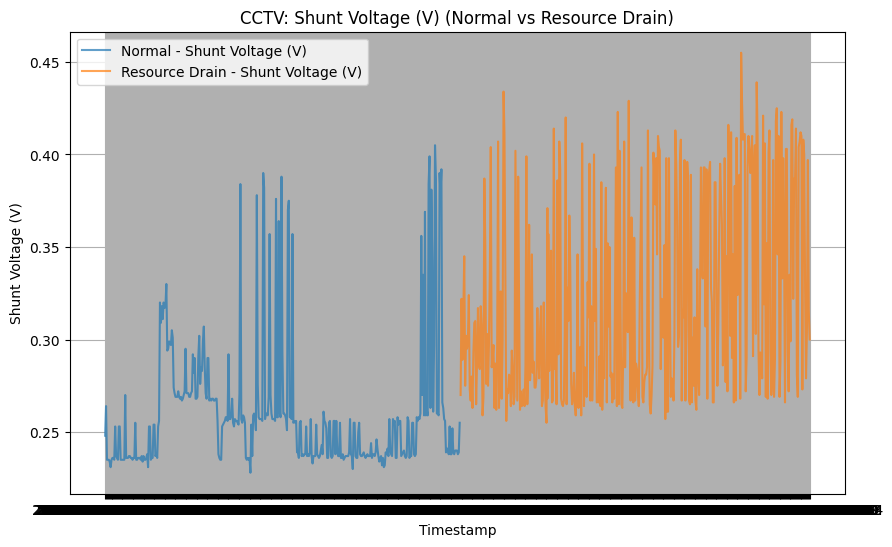

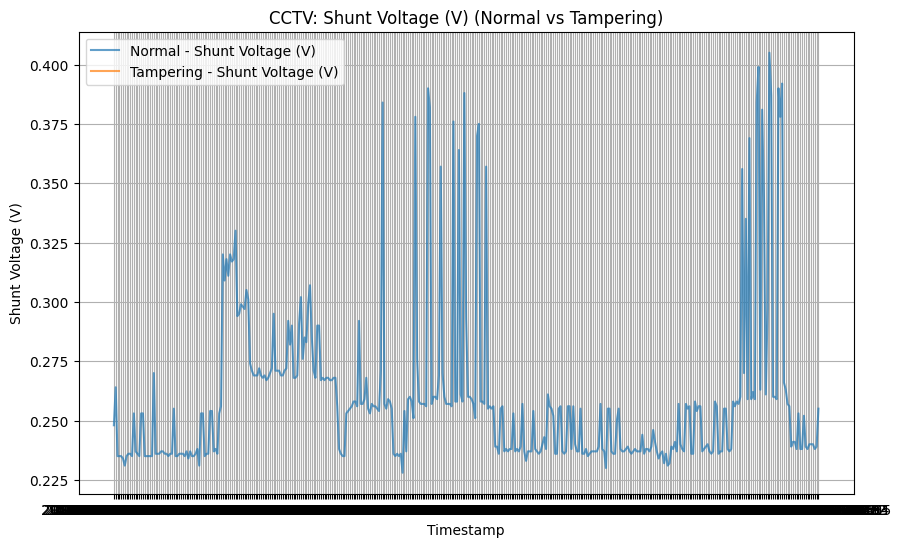

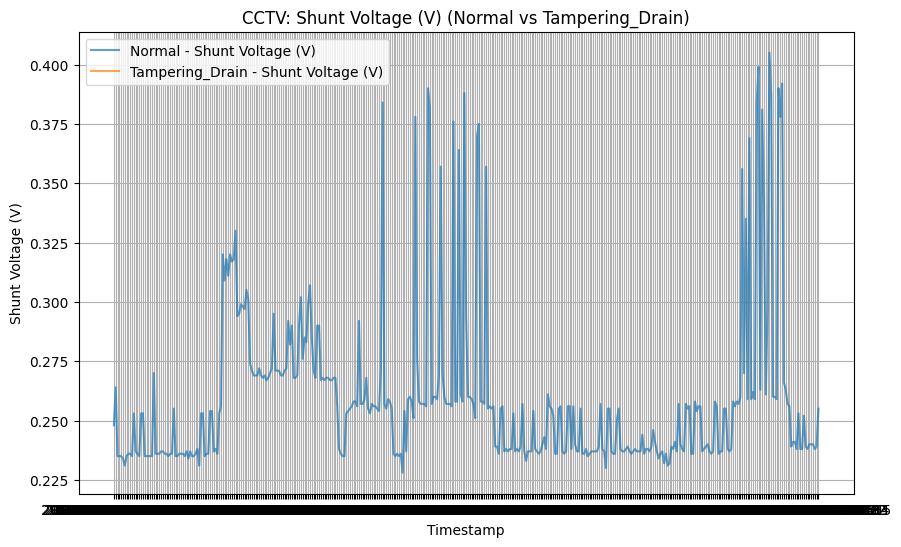

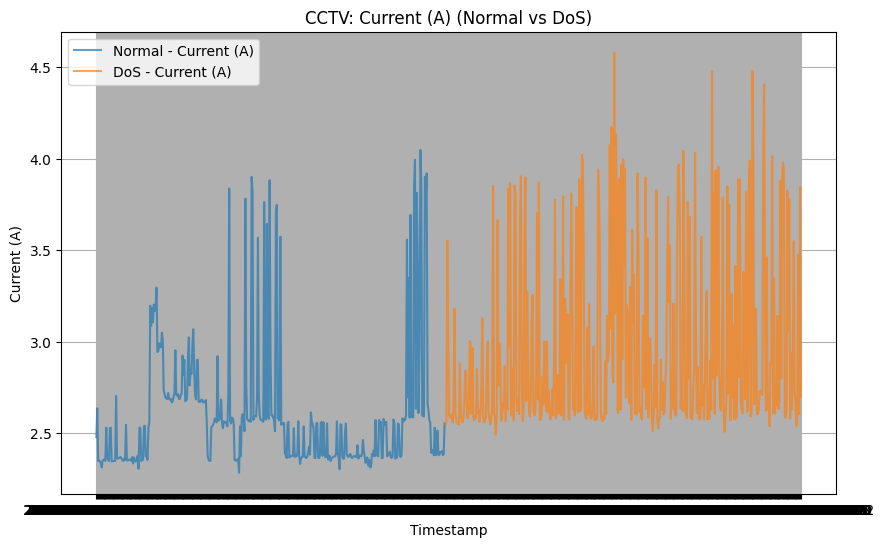

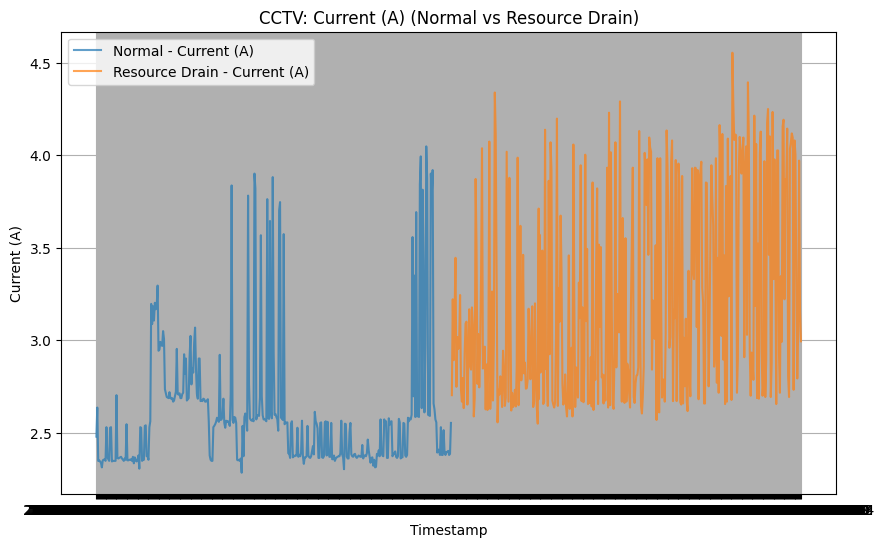

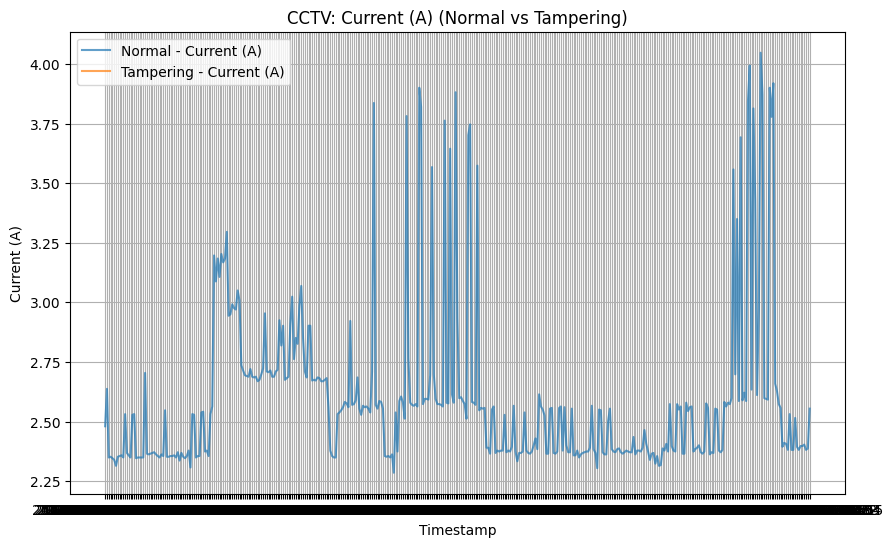

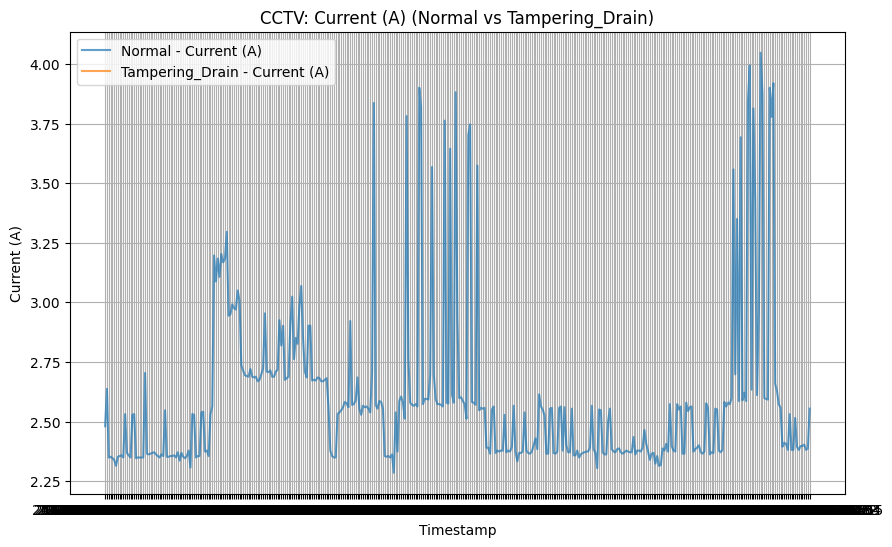

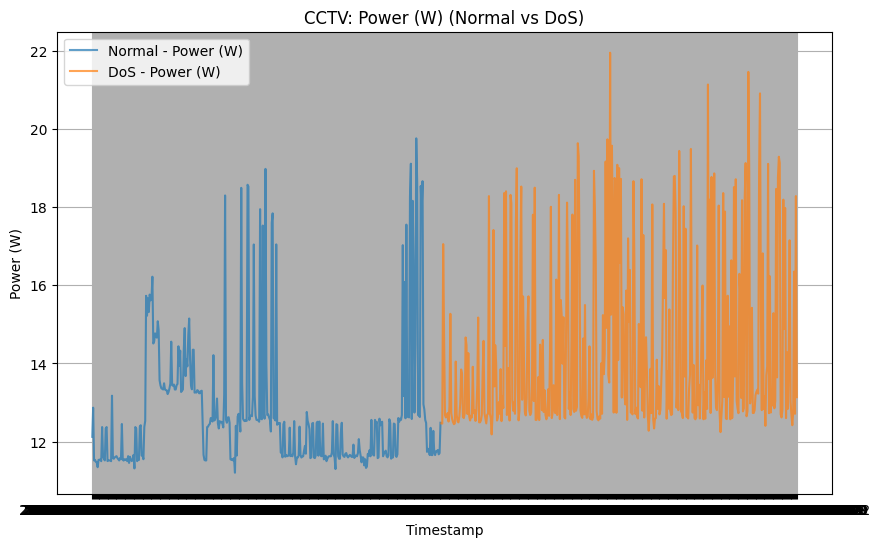

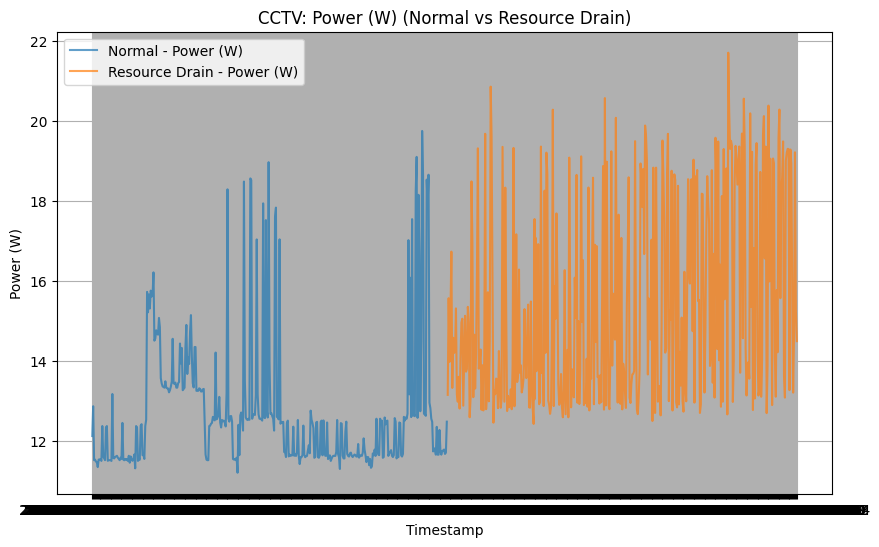

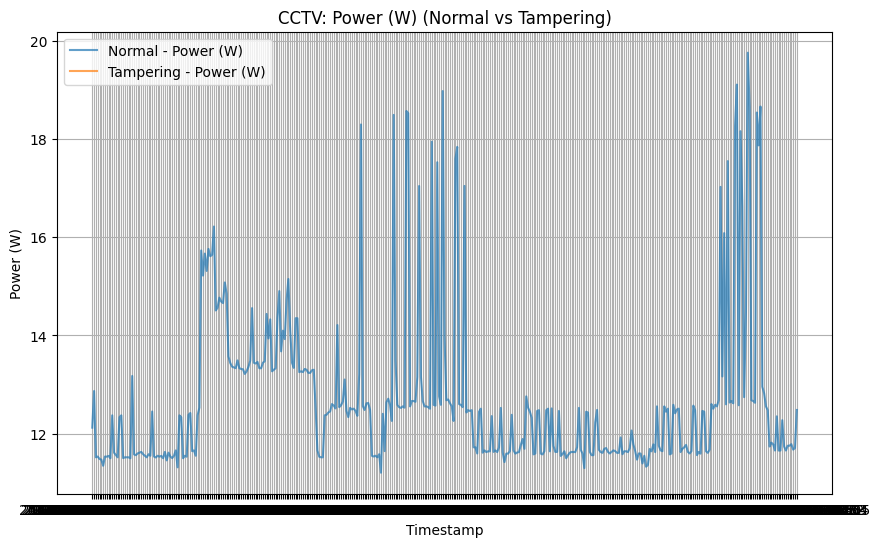

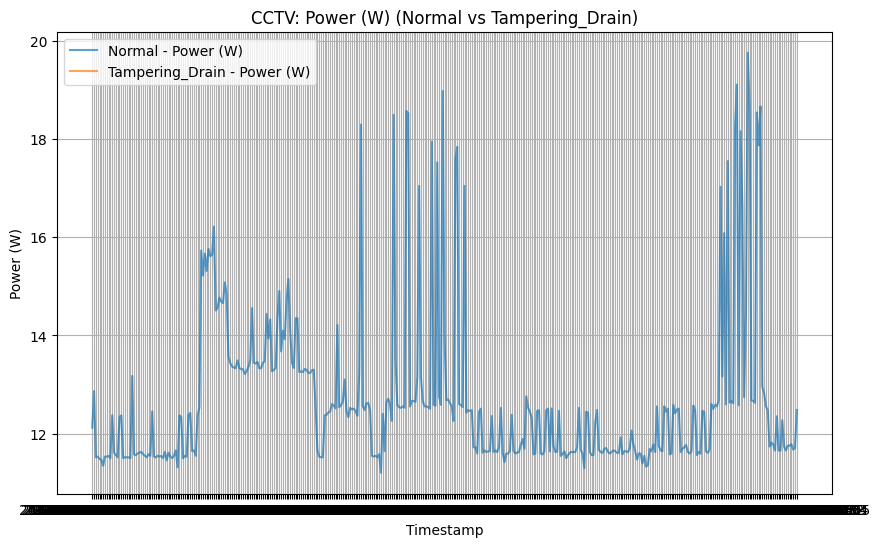

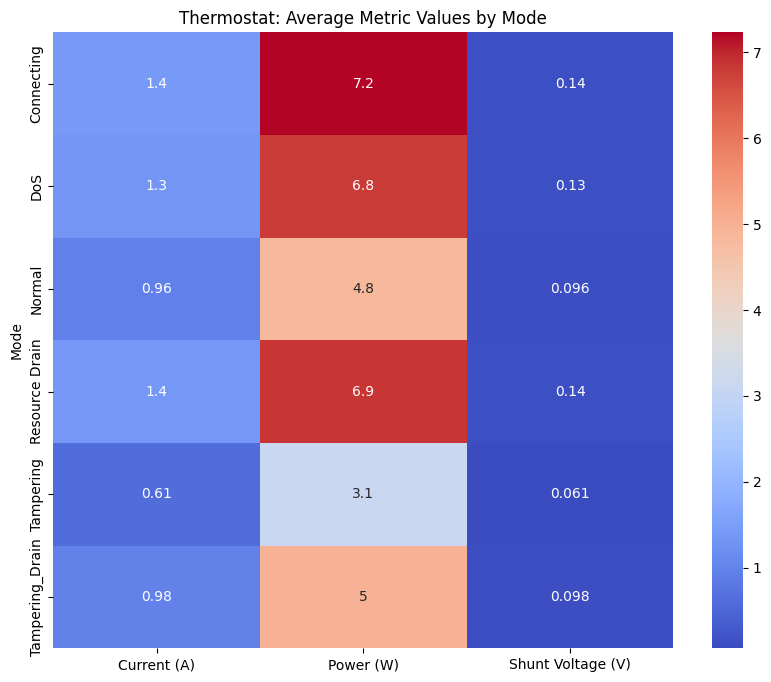

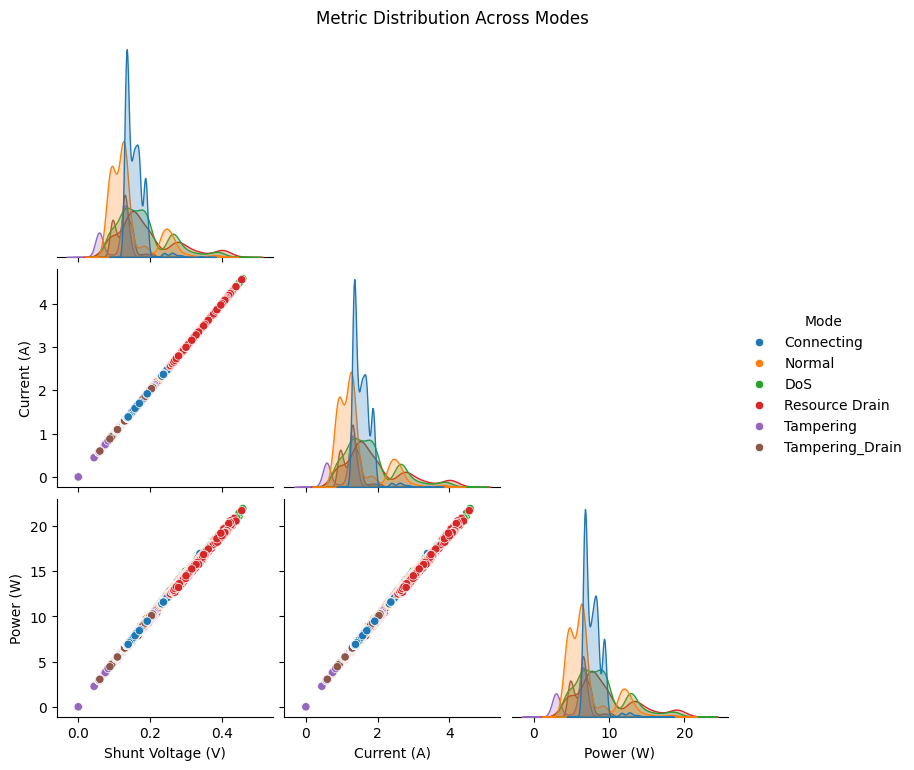

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "./raw_power_readings.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure columns are correctly named
data.columns = data.columns.str.strip()

# List of devices, metrics, and modes
devices = ['Thermostat', 'Smoke Detector', 'CCTV']
metrics = ['Shunt Voltage (V)', 'Current (A)', 'Power (W)']
modes = ['Normal', 'DoS', 'Resource Drain', 'Tampering', 'Tampering_Drain']

# Function to plot comparisons
def plot_comparison(device, metric, mode1, mode2):
    subset = data[data['Device'] == device]
    mode1_data = subset[subset['Mode'] == mode1]
    mode2_data = subset[subset['Mode'] == mode2]
    
    plt.figure(figsize=(10, 6))
    plt.plot(mode1_data['Timestamp'], mode1_data[metric], label=f"{mode1} - {metric}", alpha=0.7)
    plt.plot(mode2_data['Timestamp'], mode2_data[metric], label=f"{mode2} - {metric}", alpha=0.7)
    plt.title(f"{device}: {metric} ({mode1} vs {mode2})")
    plt.xlabel("Timestamp")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate graphs for all devices, metrics, and mode comparisons
for device in devices:
    for metric in metrics:
        for anomaly in modes[1:]:  # Skip 'Normal' for comparison
            plot_comparison(device, metric, 'Normal', anomaly)

# Heatmap for all metrics per mode for one device (Thermostat example)
thermostat_data = data[data['Device'] == 'Thermostat']
heatmap_data = thermostat_data.pivot_table(index='Mode', values=metrics, aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title("Thermostat: Average Metric Values by Mode")
plt.show()

# Pairplot for all devices showing different modes
sns.pairplot(data, hue='Mode', vars=metrics, diag_kind='kde', corner=True)
plt.suptitle("Metric Distribution Across Modes", y=1.02)
plt.show()
